In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import fftpack
%matplotlib notebook

In [197]:
k2 = pd.read_csv('/Devel/k2/data/C4/COOL/210827030.csv')

In [198]:
k2.columns = ['time','flux','error']

In [ ]:
thresh_value = np.mean(k2['flux'])+2.5*np.std(k2['flux'])

In [ ]:
thresh_line=np.ones(len(k2['time']))*thresh_value

In [ ]:
k2[k2['flux']>thresh_value].flux.count()

In [ ]:
hist = np.histogram(k2['flux'], bins=15)

In [ ]:
ticks=map(str,map(int,hist[1][1:]))

In [ ]:
map(int,hist[0])

In [ ]:
plt.bar(range(len(hist[0])),hist[0],tick_label=ticks)

In [ ]:
np.mean(k2['flux'])+2.5*np.std(k2['flux'])

In [ ]:
Ns = [5,50]
plt.plot(k2['flux'])
for N in Ns:
    plt.plot(np.convolve(k2['flux'], np.ones((N,))/N, mode='full'))
labels = np.append([0], Ns)
plt.legend(labels, loc='upper right')

In [ ]:
n_std_dev = 2.5
N = 30
thresh_value = np.mean(k2['flux'])+n_std_dev*np.std(k2['flux'])

In [ ]:
plt.plot(k2['flux'])
plt.plot(np.convolve(k2['flux'], np.ones((N,))/N, mode='full') + thresh_value)

In [ ]:
threshold_array = np.convolve(k2['flux'], np.ones((N,))/N, mode='full') + thresh_value

In [ ]:
flare_array = np.zeros(len(k2['flux']))

In [ ]:
for index in range(len(k2['flux'])):
    if k2['flux'][index] > threshold_array[index]:
        flare_array[index] =  k2['flux'][index]

In [ ]:
plt.plot(k2['time'],k2['flux'])

In [ ]:
len(flare_array[flare_array>0])

In [ ]:
flares_df = pd.read_csv('/Devel/k2/flares.csv')

In [ ]:
def test_func(x, a, b, c):
    return a * np.sin(b * x) +c

In [193]:
k2_30 = pd.read_csv('/Devel/k2/data/C4/COOL/210459199.csv') # 210579563 210700098

In [194]:
k2_30.columns = ['time','flux','error']

In [199]:
x_data = k2['time']
y_data = k2['flux']

<IPython.core.display.Javascript object>


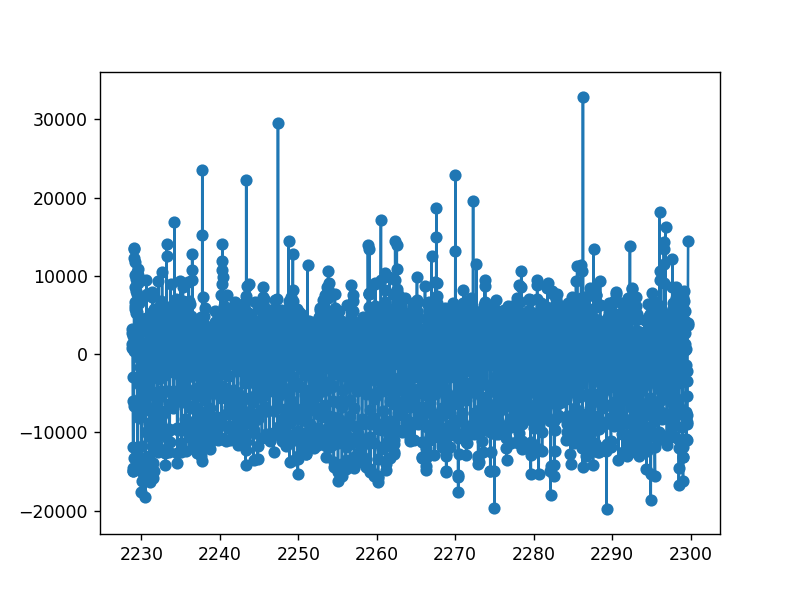

In [200]:
plt.plot(x_data, y_data)
plt.scatter(x_data, y_data)

In [ ]:
plt.plot(x_data, y_data)

In [201]:
x_data = k2['time']
y_data = k2['flux']

In [ ]:
x_data.values

In [ ]:

params, params_covariance = curve_fit(test_func,  x_data,y_data,
                                               p0=[10, 3, 5000])

In [ ]:
params

In [ ]:
from numpy import pi, r_

In [ ]:
num_points = 150
Tx = np.linspace(5., 8., num_points)
Ty = Tx

tX = 11.86*np.cos(2*pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))
tY = -32.14*np.cos(2*np.pi/0.8*Ty-1.94) + 0.15*Ty+7*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))

In [ ]:
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

In [ ]:
# Fit the second set
p0 = [-15., 0.8, 0., -1.]
p2,success = optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = np.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

In [ ]:
# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
         fontsize=16,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)


In [ ]:
p0 = [60., 1.5, 10, .5] # Initial guess for the parameters
p3, success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [ ]:
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p3,success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [ ]:
p3

In [ ]:
plt.plot(x_data, fitfunc(p3, x_data))
plt.plot(x_data, y_data, 'r-')

In [ ]:
p0 = [25., 0.9, 100, 100., .03, 10., 0.] # Initial guess for the parameters
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*np.cos(2*np.pi/p[4]*x+p[5]) + p[6]*x
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p4,success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [ ]:
p4

In [ ]:
p4=[4.93372630e+03,   2.27757883e+00,   2.92263097e+04,
         1.84129851e+03,   3.00972371e-01,   1.54301177e+03,
        -3.53885845e-01]

In [ ]:
t

In [ ]:

f1 = 40  # Frequency, in cycles per second, or Hertz
f2 = 12
f_s = 3000  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = 2000*np.sin(f1 * 2 * np.pi * t - .5)+ 12000*np.sin(f2 * 2 * np.pi * t + 1.2)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(t)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [5]:
dt = x_data[x_data.idxmin() + 1] - x_data[x_data.idxmin()]

In [6]:
cycles_per_day = 1/dt

In [7]:
cycles_per_day

48.780487804678941

<IPython.core.display.Javascript object>


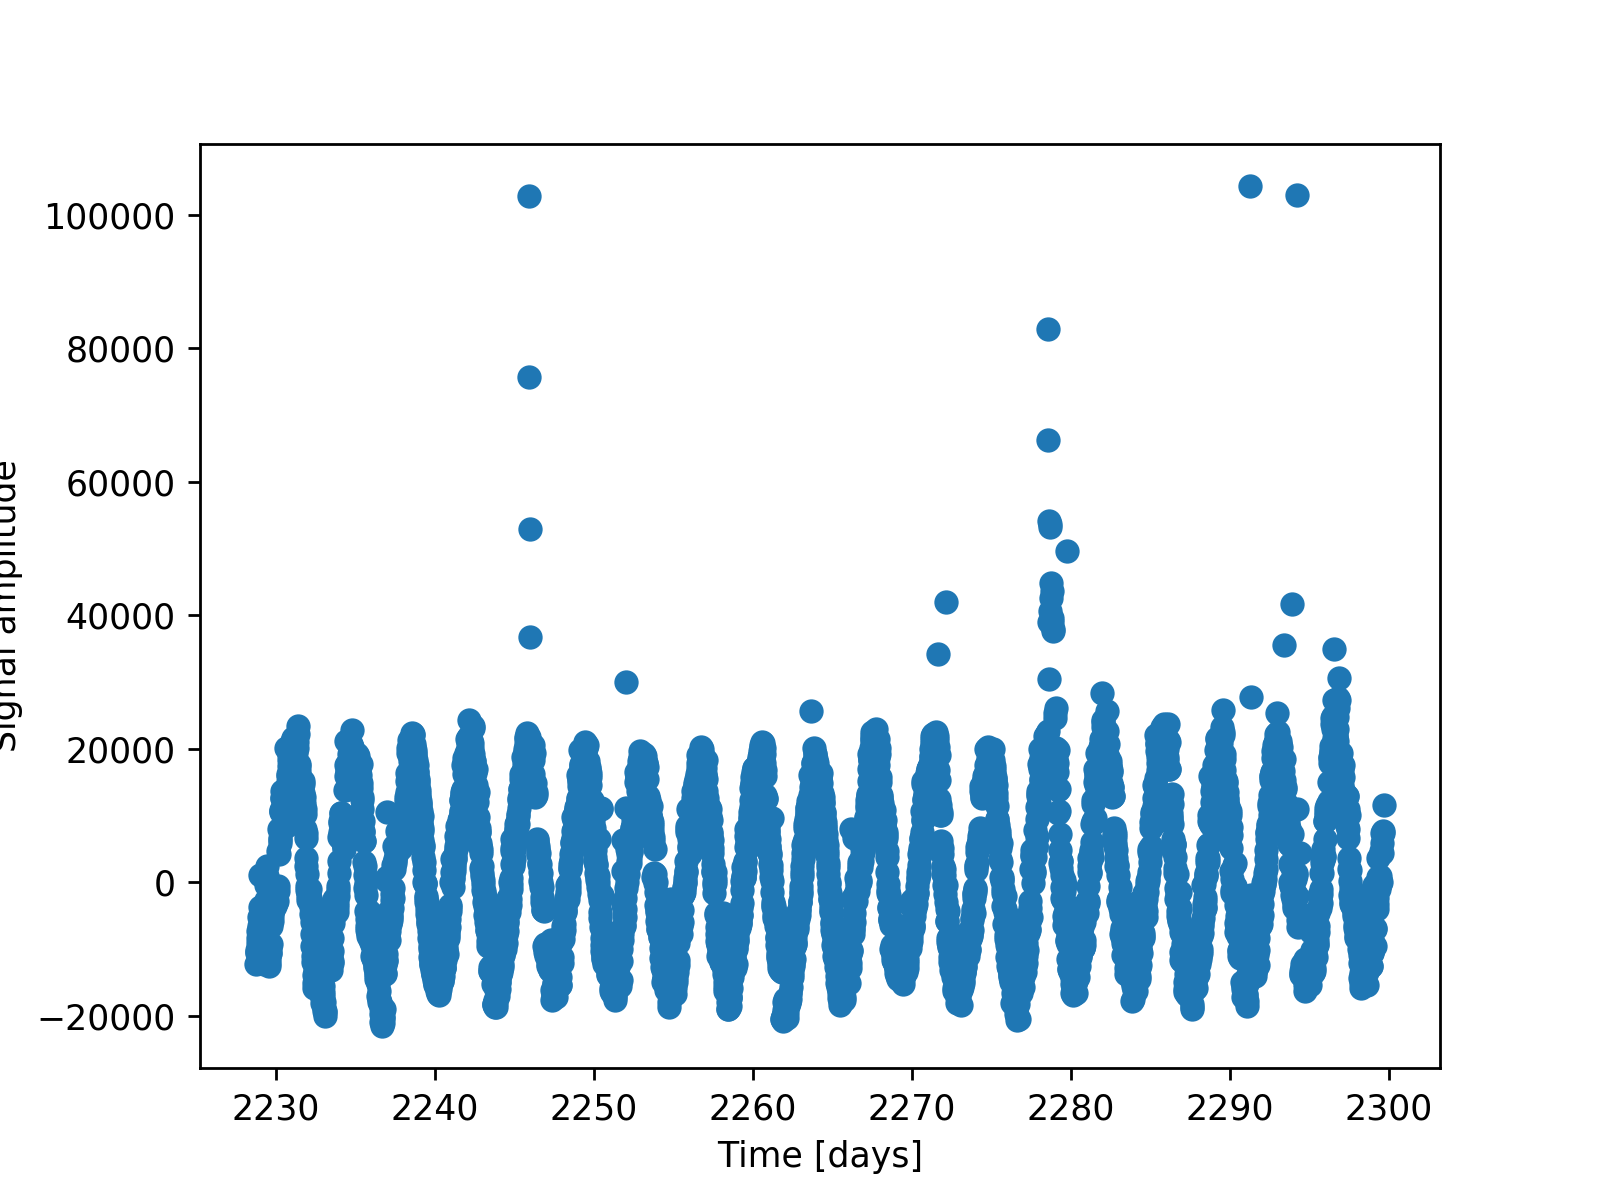

In [8]:
f_s = cycles_per_day  # Sampling rate, or number of measurements per day

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.set_xlabel('Time [days]')
ax.set_ylabel('Signal amplitude');


In [9]:
X = fftpack.fft(y_data)
freqs = fftpack.fftfreq(len(y_data)) * f_s

<IPython.core.display.Javascript object>


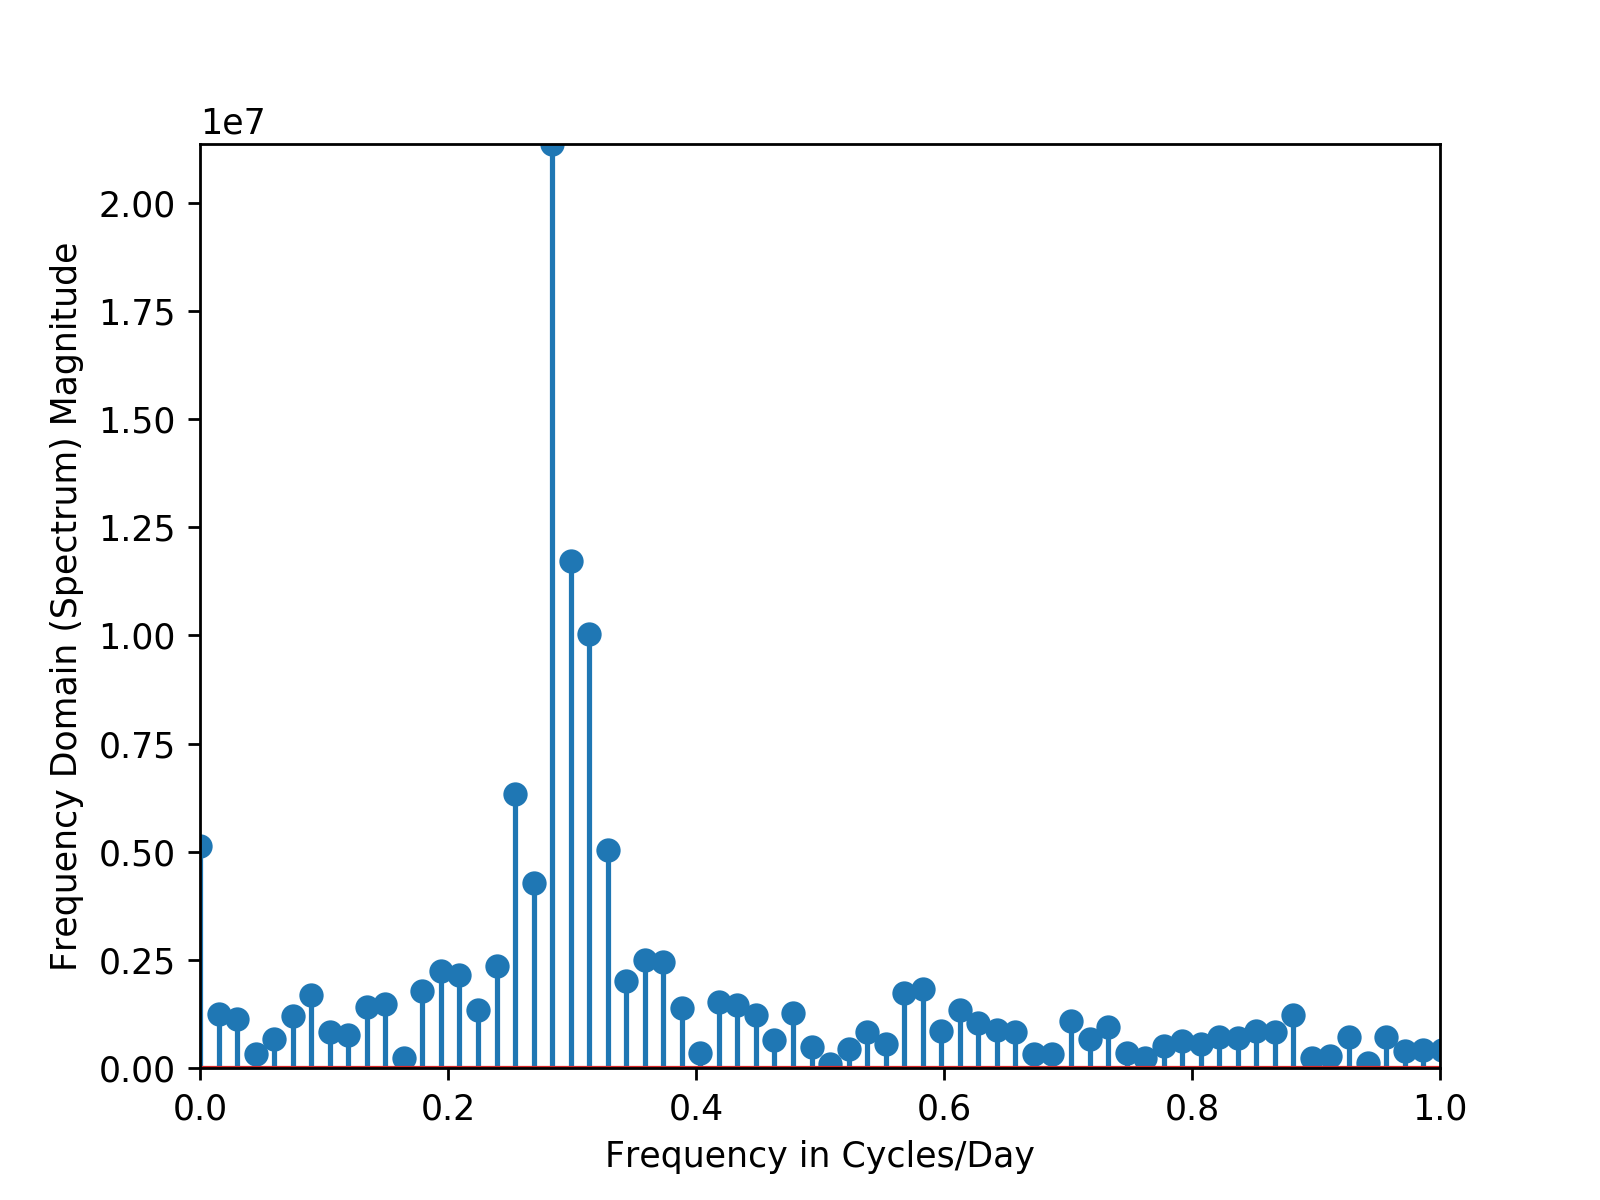

In [30]:
fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Cycles/Day')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 1)
ax.set_ylim(-5, np.max(abs(X)))
plt.savefig('fft_')

In [11]:
mags = np.abs(X[np.where(freqs>0)])

In [32]:
np.max(mags)

21355994.570492711

In [12]:
ind = np.argpartition(mags,-3)[-3:]

In [13]:
freqs[ind]

array([ 0.29890005,  0.28395505,  0.26901004])

In [14]:
mags[ind]

array([ 10032180.60499458,  11723703.88443419,  21355994.57049271])

In [34]:
mags[ind][1]/mags[ind][0]

1.1686097316267887

In [15]:
p = [mags[ind][1], 1/freqs[ind][1], 0, 0]

In [16]:
p

[11723703.884434188, 3.5216842105406903, 0, 0]

In [17]:
multifitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x
errfunc = lambda p, x, y: multifitfunc(p, x) - y # Distance to the target function
p0 = p # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [18]:
p1

array([  1.75104490e+04,   3.64086329e+00,   1.33121705e+02,
         7.92613169e-01])

<IPython.core.display.Javascript object>


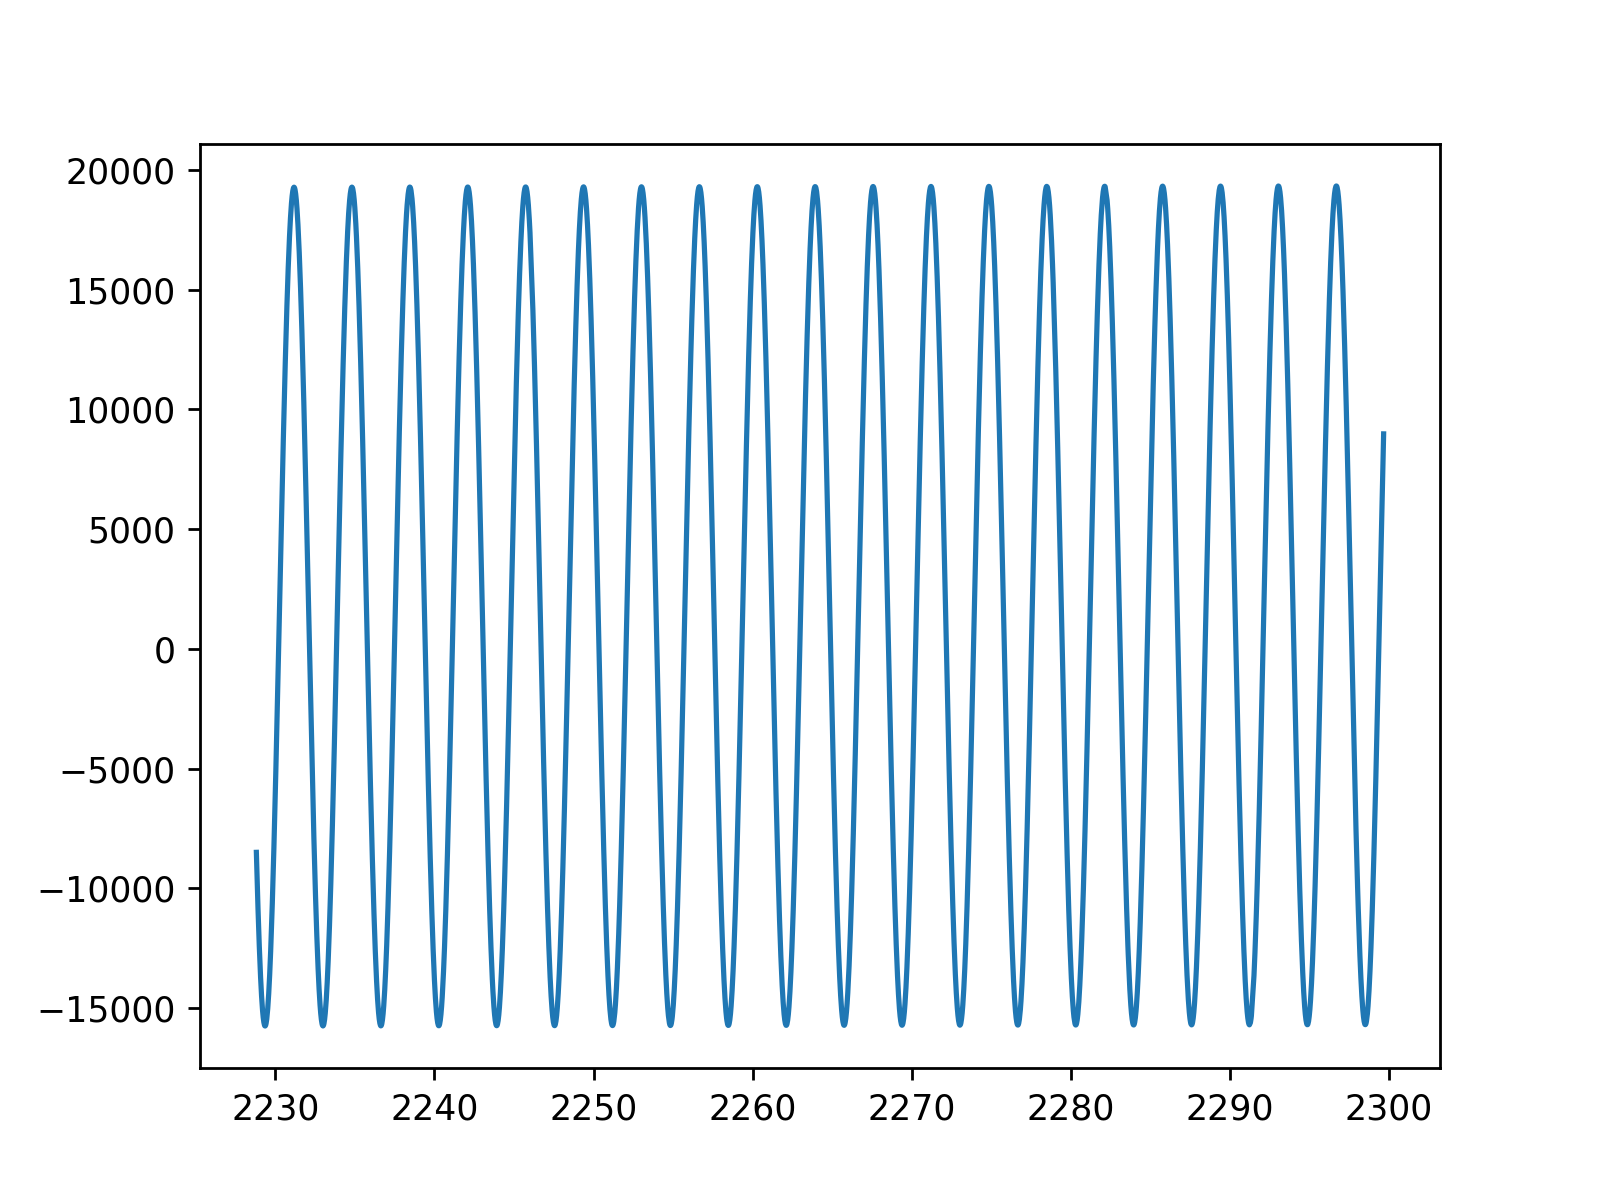

In [19]:
plt.plot(x_data,multifitfunc(p1, x_data))

In [20]:
N = 50

In [27]:
y_data_sub = y_data-multifitfunc(p1, x_data)
thresh_value = np.mean(y_data)+1.5*np.std(y_data)
k2_30_sub_low_pass = np.convolve(y_data_sub, np.ones((N,))/N, mode='full')
k2_30_sub_low_pass = k2_30_sub_low_pass[(len(k2_30_sub_low_pass) - len(y_data))/2:-(len(k2_30_sub_low_pass) - len(y_data))/2]

In [28]:
len(y_data_sub), len(x_data), len(multifitfunc(p1, x_data)), len(y_data),len(k2_30_sub_low_pass)

(3264, 3264, 3264, 3264, 3264)

In [25]:
(len(k2_30_sub_low_pass) - len(y_data))/2

24

In [26]:
len(k2_30_sub_low_pass[(len(k2_30_sub_low_pass) - len(y_data))/2:-(len(k2_30_sub_low_pass) - len(y_data))/2])

3264

In [ ]:
plt.plot(x_data, y_data)

In [ ]:
plt.scatter(x_data,y_data_sub)

In [ ]:
fig, ax = plt.subplots()

ax.stem(x_data, k2_30_sub[])

In [ ]:
flairs = []
flairs_time = np.zeros(len(k2_30_sub))
for idx, row in k2_30_sub.iterrows():
    if row['flux']>k2_30_sub_low_pass[idx]:
        flairs_time[idx] = row['flux']
        flairs.append(row['flux'])

In [ ]:
plt.scatter(x_data, flairs_time)

In [ ]:
np.mean(flairs)

In [ ]:
flairs_z_score = (flairs - np.mean(flairs))/np.std(flairs)

In [ ]:
hist = np.histogram(flairs_z_score, bins=15)

In [ ]:
hist

In [ ]:
plt.hist(flairs_z_score[flairs_z_score>0])

In [ ]:
flairs_z_score[flairs_z_score>0]

In [ ]:
ticks=map(str,map(int,hist[1][1:]))
len(ticks)

In [ ]:
plt.show()

In [ ]:
thresh_value = np.mean(k2_30_sub_low_pass + 4*np.std(k2_30_sub_low_pass))

In [ ]:
thresh_value

In [ ]:
thresh_array = np.zeros(len(x_data)) + thresh_value

In [ ]:
plt.plot(x_data, y_data_sub)
plt.plot(x_data, thresh_array)

In [ ]:
flux = k2_30_sub['flux']

In [ ]:
flair_points = flux[flux>thresh_value]

In [ ]:
indices = np.array(flair_points.index)

In [ ]:
indices.dtype

In [ ]:
it = np.nditer(indices, flags=['c_index'])

In [ ]:
flairs = 0
above_thresh = False
while not it.finished:
    if (it.index < len(indices)-1) and (indices[it.index +1] - indices[it.index] == 1) and not above_thresh:
        above_thresh = True
        print indices[it.index]
        flairs += 1
    else:
        above_thresh = False
    it.iternext() 
print(flairs)

In [ ]:
# Magnitude 1, period 1, phase 1, magnitude2, phase2, offset

pm = [mags[ind][0], 1/freqs[ind][0], 0, mags[ind][1], 1/freqs[ind][1], 0, 0]

In [ ]:
mags

In [ ]:
pm

In [ ]:
multifitfunc2 = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*np.cos(2*np.pi/p[4]*x+p[5]) +p[6]*x
errfunc = lambda p, x, y: multifitfunc2(p, x) - y # Distance to the target function
p0 = pm # Initial guess for the parameters
p1m, success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [ ]:
fit = multifitfunc2(p1m, x_data)

In [ ]:
p1m

In [ ]:
plt.plot(x_data,y_data)
plt.plot(x_data,10*fit+5000)

In [35]:
from scipy.interpolate import CubicSpline

In [75]:
cs = CubicSpline(x_data, y_data)

In [56]:
x_data[0],x_data.values[-1]

(2228.8004999999998, 2299.6786000000002)

In [73]:
xs = np.arange(x_data[0], x_data.values[-1], 1)

<IPython.core.display.Javascript object>


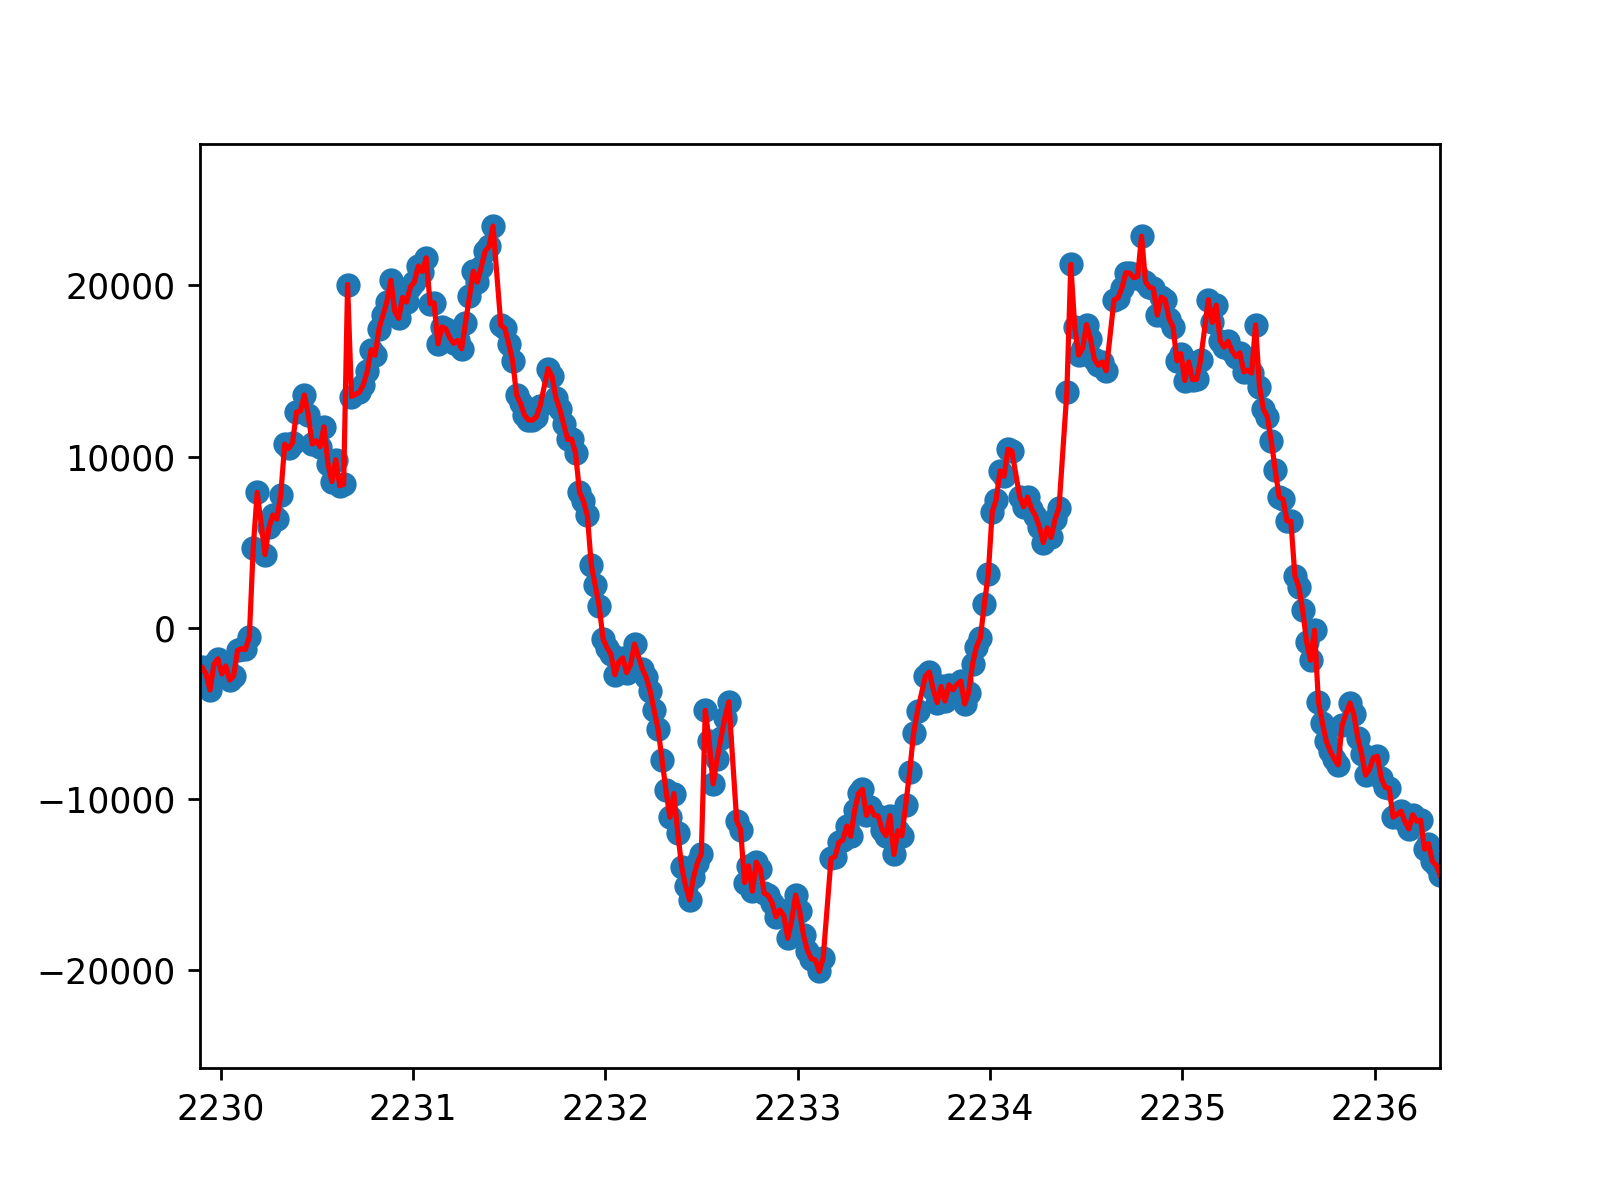

In [77]:
plt.scatter(x_data,y_data)
plt.plot(x_data, cs(x_data),'-r')

In [206]:
x1_data = k2['time']
y1_data = k2['flux']

<IPython.core.display.Javascript object>


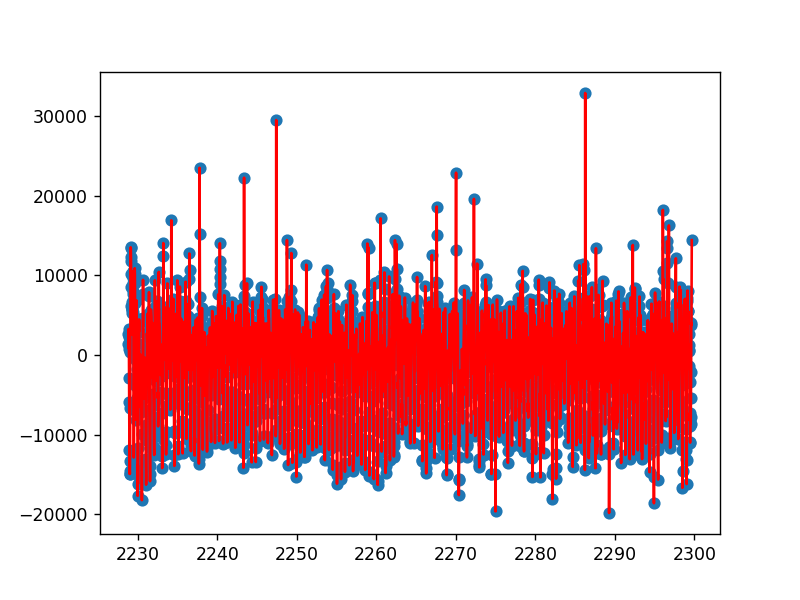

In [207]:
plt.scatter(x1_data,y1_data)
plt.plot(x1_data, y1_data,'-r')

In [212]:
it = np.nditer(y_data, flags=['c_index'])

In [213]:
d1 = np.zeros(len(x1_data))
dt = np.zeros(len(x1_data))
while not it.finished:
    if it.index < len(y1_data)-1:
        dt[it.index] = x1_data[it.index + 1] - x1_data[it.index]
        d1[it.index] = (y1_data[it.index + 1] - y1_data[it.index])/(x1_data[it.index + 1] - x1_data[it.index])
    
    it.iternext() 
    

In [214]:
d1

array([  64821.25853632,   29464.84313743, -120974.43627521, ...,
        -11693.66176477,  260960.57457235,       0.        ])

In [215]:
pos_threshold = np.std(d1[d1>0])+np.mean(d1[d1>0])
neg_threshold = -np.std(d1[d1<0])+np.mean(d1[d1<0])

<IPython.core.display.Javascript object>


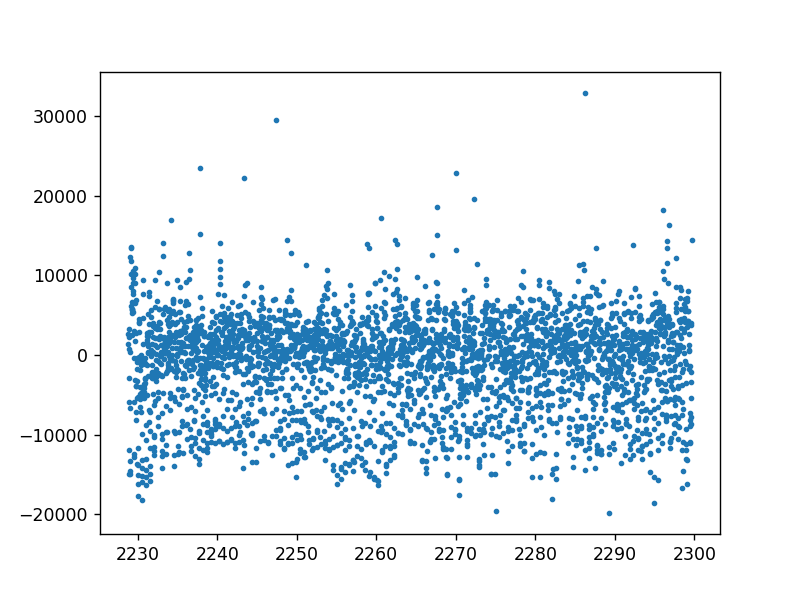

In [210]:
plt.scatter(x_data, y_data, s=5)

In [216]:
pos_threshold_line = np.zeros(len(x_data)) + pos_threshold
neg_threshold_line = np.zeros(len(x_data)) + neg_threshold

<IPython.core.display.Javascript object>


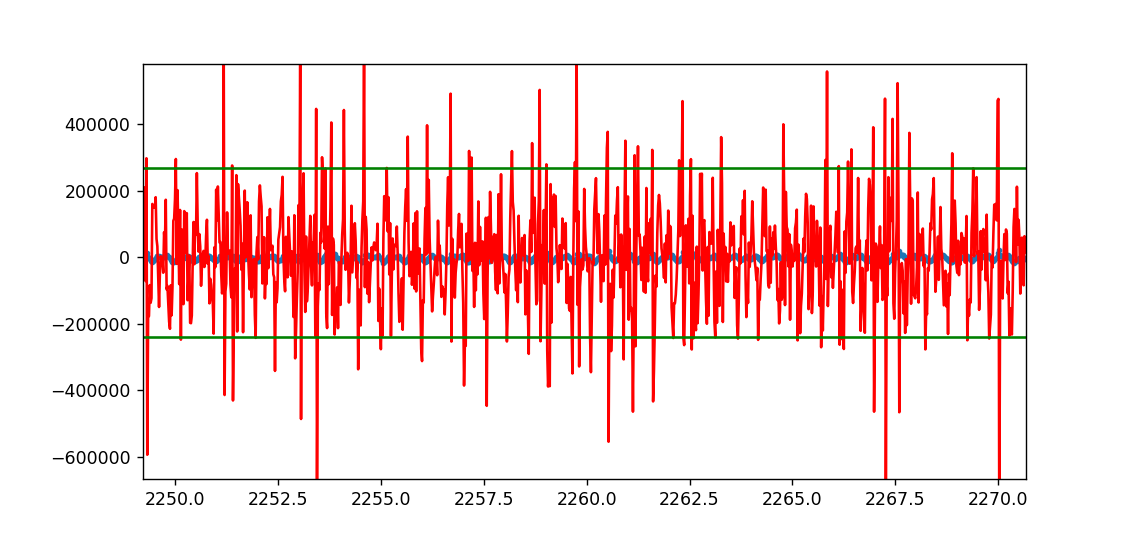

In [224]:
plt.plot(x1_data, d1,'-r')
plt.scatter(x1_data, y1_data, s=5)

plt.plot(x1_data, pos_threshold_line,'-g')
plt.plot(x1_data, neg_threshold_line,'-g')

In [218]:
len(d1[d1>pos_threshold])

152

In [219]:
np.where(d1>pos_threshold)[0]

array([  11,   12,   13,   34,   35,   37,   45,   48,   60,   84,  108,
        132,  156,  157,  180,  203,  206,  252,  253,  288,  298,  321,
        359,  369,  395,  419,  420,  518,  541,  587,  661,  686,  691,
        702,  742,  802,  849,  872,  936,  962,  995, 1050, 1059, 1135,
       1153, 1160, 1170, 1185, 1208, 1233, 1257, 1279, 1305, 1326, 1329,
       1375, 1398, 1407, 1414, 1447, 1449, 1484, 1485, 1505, 1516, 1520,
       1537, 1567, 1571, 1581, 1617, 1689, 1738, 1740, 1751, 1762, 1766,
       1791, 1805, 1814, 1820, 1834, 1883, 1936, 1937, 1983, 1998, 2034,
       2046, 2053, 2057, 2066, 2102, 2108, 2157, 2178, 2203, 2224, 2298,
       2318, 2321, 2333, 2343, 2389, 2390, 2409, 2434, 2458, 2483, 2523,
       2594, 2614, 2634, 2643, 2648, 2669, 2682, 2683, 2709, 2710, 2731,
       2743, 2744, 2781, 2808, 2821, 2858, 2871, 2888, 2903, 2937, 2938,
       2952, 2957, 2962, 2989, 2995, 3023, 3052, 3063, 3096, 3099, 3120,
       3122, 3145, 3146, 3157, 3195, 3249, 3261, 32

In [220]:
np.where(d1<neg_threshold)[0]

array([   4,    6,   32,   46,   49,   54,   78,   89,  102,  116,  124,
        208,  215,  223,  254,  266,  289,  293,  304,  342,  362,  365,
        421,  422,  486,  534,  536,  561,  582,  606,  631,  687,  692,
        703,  749,  751,  753,  786,  797,  823,  846,  855,  873,  893,
        937,  942,  963, 1001, 1051, 1060, 1085, 1107, 1129, 1136, 1154,
       1201, 1226, 1272, 1273, 1306, 1320, 1321, 1322, 1347, 1370, 1394,
       1408, 1415, 1416, 1417, 1418, 1444, 1452, 1466, 1486, 1489, 1503,
       1514, 1517, 1538, 1539, 1560, 1572, 1573, 1582, 1584, 1610, 1636,
       1659, 1706, 1733, 1752, 1754, 1757, 1792, 1806, 1822, 1852, 1901,
       1927, 1938, 2035, 2047, 2054, 2067, 2076, 2103, 2126, 2151, 2176,
       2179, 2196, 2225, 2245, 2292, 2338, 2357, 2383, 2384, 2407, 2427,
       2432, 2452, 2473, 2500, 2518, 2519, 2552, 2559, 2587, 2606, 2626,
       2644, 2651, 2655, 2674, 2677, 2679, 2684, 2691, 2703, 2722, 2734,
       2741, 2742, 2745, 2746, 2747, 2771, 2791, 28

In [221]:
d1_thresh = np.concatenate((np.where(d1>pos_threshold)[0], np.where(d1<neg_threshold)[0]))

In [222]:
indices = np.sort(d1_thresh)

In [223]:
it = np.nditer(indices, flags=['c_index'])
flairs = 0
above_thresh = False
while not it.finished:
    if (it.index < len(indices)-1) and (indices[it.index +1] - indices[it.index] == 1) and not above_thresh:
        above_thresh = True
        print indices[it.index]
        flairs += 1
    else:
        above_thresh = False
    it.iternext() 
print(flairs)

11
34
45
48
156
252
288
419
421
686
691
702
872
936
962
1050
1059
1135
1153
1272
1305
1320
1407
1414
1416
1484
1516
1537
1571
1581
1751
1791
1805
1936
2034
2046
2053
2066
2102
2178
2224
2383
2389
2518
2643
2682
2709
2741
2743
2745
2818
2887
2937
2952
2957
3122
3145
3157
3281
59
